In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [10]:
string = "0100000100101000:11d48ed9dCQIc6ab6c6147d845e586da03b9"

# Find the position of ":"
colon_position = string.index(":")

# Count the number of characters before ":"
character_count = colon_position

print(f"Number of characters before ':' is {character_count}.")
dimension = math.sqrt(character_count)
print("The dimension of the permutation matrix is : ", dimension, " x ", dimension)

# Get the matrix of permutation
permutation_string = string.split(":")[0]
permutation_matrix = np.array(list(map(int, permutation_string)))

permutation_matrix = permutation_matrix.reshape((4, 4))
print("Permutation matrix is :")
print(permutation_matrix)

inverse_transpose_perm_matrix = np.linalg.inv(permutation_matrix).T
print("Inverse of the transpostition permutation matrix is :")
print(permutation_matrix)

# Get encoding string
base17_code_str= string[colon_position + 1:]
base17_code_str = base17_code_str.replace("CQI", 'g')

print("Encoding :", base17_code_str)

Number of characters before ':' is 16.
The dimension of the permutation matrix is :  4.0  x  4.0
Permutation matrix is :
[[0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]]
Inverse of the transpostition permutation matrix is :
[[0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]]
Encoding : 11d48ed9dgc6ab6c6147d845e586da03b9


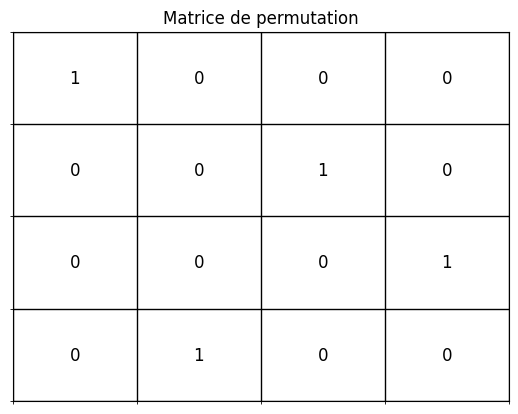

In [38]:
# Ressources : https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks

#Show initial permutation matrix
fig, ax = plt.subplots()

# show number in grid
for i in range(len(permutation_matrix)):
    for j in range(len(permutation_matrix)):
        ax.text(j, i, str(permutation_matrix[i, j]),
                ha='center', va='center', fontsize=12)

# Add line to grid
ax.set_xticks(np.arange(-0.5, len(permutation_matrix), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(permutation_matrix), 1), minor=True)
ax.grid(which='minor', linestyle='-', linewidth=1, color='black')

# Hide axis titles
ax.set_xticks([])
ax.set_yticks([])

plt.title("Matrice de permutation")
plt.show()

In [11]:
# Convert base-17 to decimal
decimal_number = int(base17_code_str, 17)

# Convert decimal to binary
binary_string = bin(decimal_number)[2:]

print("The result of convert base 17 to bin is : ", binary_string)

The result of convert base 17 to bin is :  1000001010101111101010111010001110101111111011001110001000100000101010011010110000100000101011011010111110101011101010001010110000100100


In [24]:
binary_string = "1000001010101111101010111010001110101111111011001110001000100000101010011010110000100000101011011010111110101011101010001010110000100100"

# Split the string into groups of 4 characters
grouped_characters = [binary_string[i:i+4] for i in range(0, len(binary_string), 4)]

# Convert each group to a list of integers
matrix_list = [list(map(int, group)) for group in grouped_characters]

# Convert the list of lists to a 2D NumPy array with 4 columns
binrary_matrix = np.array(matrix_list)
print(matrix_list[0])
print(matrix_list[0][0])

[1, 0, 0, 0]
1


In [ ]:

binrary_before_perm_matrix = np.matmul(binrary_matrix, inverse_transpose_perm_matrix)
print(binrary_before_perm_matrix.flatten().astype(int))

[0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1
 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1]


In [ ]:
binrary_before_perm_string = ''.join(map(str, binrary_before_perm_matrix.flatten().astype(int)))
ascii_string = ''.join([chr(int(binrary_before_perm_string[i:i+8], 2)) for i in range(0, len(binrary_before_perm_string), 8)])

print("ASCII String:")
print(ascii_string)

ASCII String:
Bonjour le monde!
